## Task 3 - Experience Analytics

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing telcom data set 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
db=pd.read_csv('E:\\DATA science\\Intership Programm\\telcom_data.csv', na_values=['?',None])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### Partitioning the dataset into separate entities based on numerical and categorical values for targeted analysis and distinct treatment.

In [3]:
# Select numerical columns
numerical_db = db.select_dtypes(include='float')

# Select categorical/object columns
categorical_db = db.select_dtypes(exclude='float')


In [4]:
# Filling numerical missing values with Mean value
missing_v=numerical_db.isnull().sum()
for col in missing_v.index:
    numerical_db[col].fillna(numerical_db[col].mean(), inplace=True)

In [5]:
# Filling Categorical missing values with mode value
missing_val=categorical_db.isna().sum()
for col in missing_val.index:
    categorical_db[col].fillna(categorical_db[col].mode()[0], inplace=True)

### Updating missing values in db1 with the values from numerical_db and numerical_db

In [6]:
db.update(numerical_db)
db.update(categorical_db)

In [7]:
db.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [8]:
def replace_outliers_with_mean(column):
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Check if there are outliers in the column
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        
        # If outliers exist, replace them with the mean value
        if not outliers.empty:
            column = column.where(~((column < lower_bound) | (column > upper_bound)), column.mean())
        
    return column

In [9]:
db1 = db.apply(replace_outliers_with_mean)

# Print the modified DataFrame with outliers replaced by mean values
print(db)

           Bearer Id             Start  Start ms               End     End ms  \
0       1.311450e+19  04-04-2019 12:01  770.0000  25-04-2019 14:35  662.00000   
1       1.311450e+19  09-04-2019 13:04  235.0000  25-04-2019 08:15  606.00000   
2       1.311450e+19  09-04-2019 17:42    1.0000  25-04-2019 11:58  652.00000   
3       1.311450e+19  10-04-2019 00:31  486.0000  25-04-2019 07:36  171.00000   
4       1.311450e+19  12-04-2019 20:10  565.0000  25-04-2019 10:40  954.00000   
...              ...               ...       ...               ...        ...   
149996  7.277830e+18  29-04-2019 07:28  451.0000  30-04-2019 06:02  214.00000   
149997  7.349880e+18  29-04-2019 07:28  483.0000  30-04-2019 10:41  187.00000   
149998  1.311450e+19  29-04-2019 07:28  283.0000  30-04-2019 10:46  810.00000   
149999  1.311450e+19  29-04-2019 07:28  696.0000  30-04-2019 10:40  327.00000   
150000  1.013887e+19  26-04-2019 07:25  499.1882  25-04-2019 00:01  498.80088   

           Dur. (ms)       

In [10]:
# Grouping by 'MSISDN/Number' and aggregating the required columns
grouped_data = db.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': lambda x: x.mode().iloc[0] if not x.mode().empty else None
}).reset_index()

# Calculate Average TCP Retransmission considering both DL and UL for each user
grouped_data['Average TCP Retransmission'] = (grouped_data['TCP DL Retrans. Vol (Bytes)'] + grouped_data['TCP UL Retrans. Vol (Bytes)']) / 2

# Calculate Average RTT for each user
grouped_data['Average RTT'] = (grouped_data['Avg RTT DL (ms)'] + grouped_data['Avg RTT UL (ms)']) / 2

# Calculate Average Throughput considering both DL and UL for each user
grouped_data['Average Throughput'] = (grouped_data['Avg Bearer TP DL (kbps)'] + grouped_data['Avg Bearer TP UL (kbps)']) / 2

# Display the calculated values per user
print(grouped_data[['MSISDN/Number', 'Average TCP Retransmission', 'Average RTT', 'Handset Type', 'Average Throughput']])


        MSISDN/Number  Average TCP Retransmission  Average RTT  \
0        3.360100e+10                1.078479e+07    23.000000   
1        3.360100e+10                1.078479e+07    15.500000   
2        3.360100e+10                1.078479e+07    63.729294   
3        3.360101e+10                3.803623e+05    42.000000   
4        3.360101e+10                7.735101e+06    29.750000   
...               ...                         ...          ...   
106852   3.379000e+10                1.078479e+07    20.000000   
106853   4.188282e+10                8.491987e+06   154.561991   
106854   3.197020e+12                1.078479e+07    63.729294   
106855   3.370000e+14                1.078479e+07    63.729294   
106856   8.823970e+14                1.078479e+07    63.729294   

                            Handset Type  Average Throughput  
0         Huawei P20 Lite Huawei Nova 3E           38.000000  
1                 Apple iPhone 7 (A1778)           49.500000  
2                 

### Visualizing Handset Types

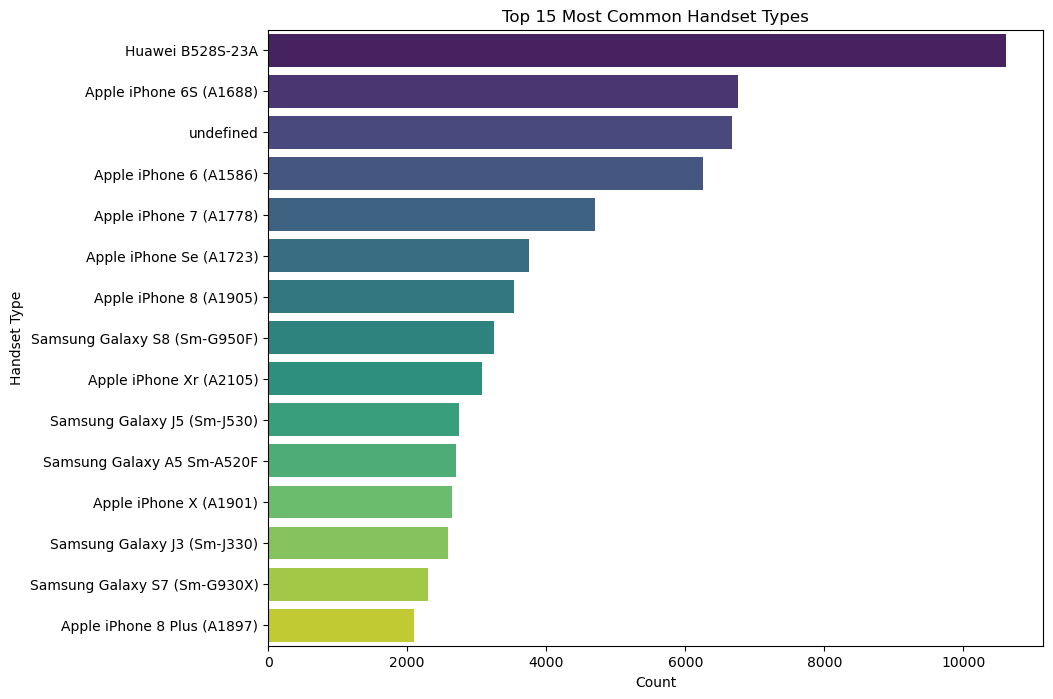

In [11]:
# Count the occurrences of each handset type
top_n = 15  # Change this value to display a different number of top handset types
top_handsets = grouped_data['Handset Type'].value_counts().nlargest(top_n)

# Visualizing Top N Handset Types
plt.figure(figsize=(10, 8))
sns.barplot(x=top_handsets.values, y=top_handsets.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Handset Type')
plt.title(f'Top {top_n} Most Common Handset Types')
plt.show()

### Task 3.2 - Computing & listing 10 of the top, bottom and most frequent:
a.	TCP values in the dataset. 
b.	RTT values in the dataset.
c.	Throughput values in the dataset.


In [12]:
# Function to compute top N values
def top_n_values(data, column, n=10):
    return data[column].nlargest(n)

# Function to compute bottom N values
def bottom_n_values(data, column, n=10):
    return data[column].nsmallest(n)

# Function to compute most frequent values
def most_frequent_values(data, column, n=10):
    return data[column].value_counts().head(n)

# Compute top, bottom, and most frequent TCP values
top_10_tcp = top_n_values(grouped_data, 'Average TCP Retransmission')
bottom_10_tcp = bottom_n_values(grouped_data, 'Average TCP Retransmission')
most_frequent_tcp = most_frequent_values(grouped_data, 'Average TCP Retransmission')

# Compute top, bottom, and most frequent RTT values
top_10_rtt = top_n_values(grouped_data, 'Average RTT')
bottom_10_rtt = bottom_n_values(grouped_data, 'Average RTT')
most_frequent_rtt = most_frequent_values(grouped_data, 'Average RTT')

# Compute top, bottom, and most frequent Throughput values
top_10_throughput = top_n_values(grouped_data, 'Average Throughput')
bottom_10_throughput = bottom_n_values(grouped_data, 'Average Throughput')
most_frequent_throughput = most_frequent_values(grouped_data, 'Average Throughput')

# Display the computed values
print("Top 10 TCP Values:\n", top_10_tcp)
print("Bottom 10 TCP Values:\n", bottom_10_tcp)
print("Most Frequent TCP Values:\n", most_frequent_tcp)

print("\nTop 10 RTT Values:\n", top_10_rtt)
print("Bottom 10 RTT Values:\n", bottom_10_rtt)
print("Most Frequent RTT Values:\n", most_frequent_rtt)

print("\nTop 10 Throughput Values:\n", top_10_throughput)
print("Bottom 10 Throughput Values:\n", bottom_10_throughput)
print("Most Frequent Throughput Values:\n", most_frequent_throughput)


Top 10 TCP Values:
 85785    2.150739e+09
32273    2.144060e+09
58026    2.134324e+09
31942    2.127330e+09
62049    2.105629e+09
70079    2.083297e+09
43629    2.068969e+09
48341    2.058902e+09
64113    1.984060e+09
98211    1.893435e+09
Name: Average TCP Retransmission, dtype: float64
Bottom 10 TCP Values:
 23472     48.5
6359      64.0
96977     64.5
13546     67.0
2177      71.5
25863     88.0
102198    88.0
105775    88.5
78100     89.5
89395     91.0
Name: Average TCP Retransmission, dtype: float64
Most Frequent TCP Values:
 1.078479e+07    55974
1.040560e+07      367
1.040562e+07      167
3.804943e+05      145
1.059520e+07       82
1.040562e+07       81
3.811593e+05       78
3.798753e+05       78
3.798483e+05       70
1.040629e+07       65
Name: Average TCP Retransmission, dtype: int64

Top 10 RTT Values:
 47983     48462.00
80249     27424.00
41944     16167.50
93844     13639.00
1713      13150.00
74240     12857.50
104325    12694.00
105752    12369.00
85683     11505.25
154

In [13]:
grouped_data.columns

Index(['MSISDN/Number', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Handset Type',
       'Average TCP Retransmission', 'Average RTT', 'Average Throughput'],
      dtype='object')

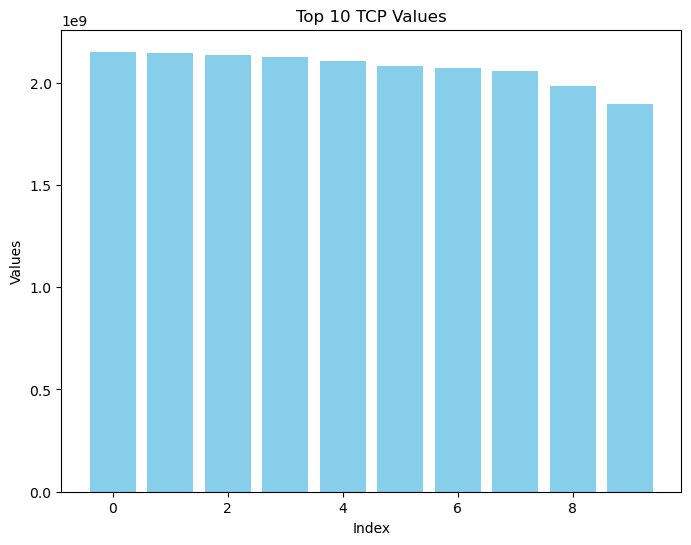

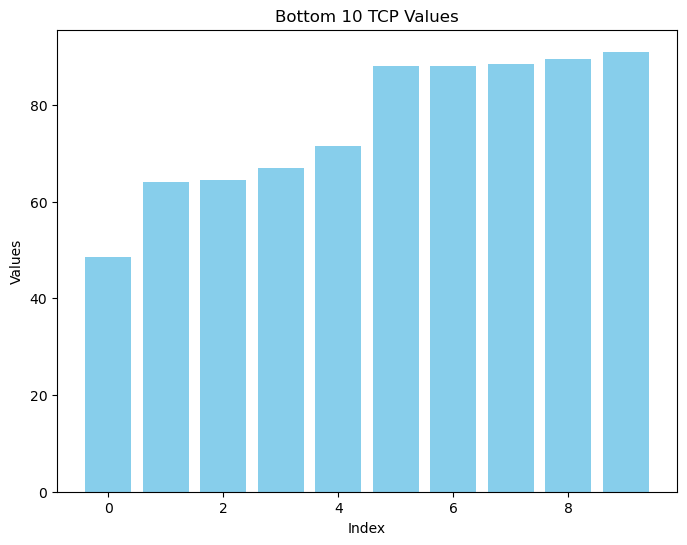

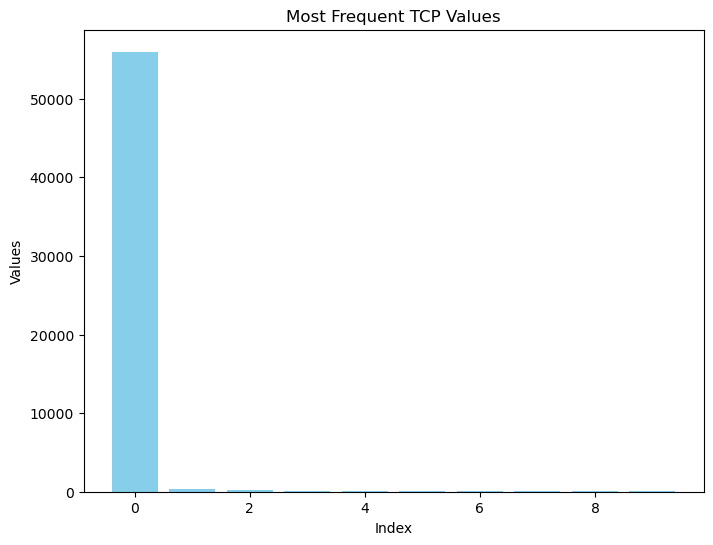

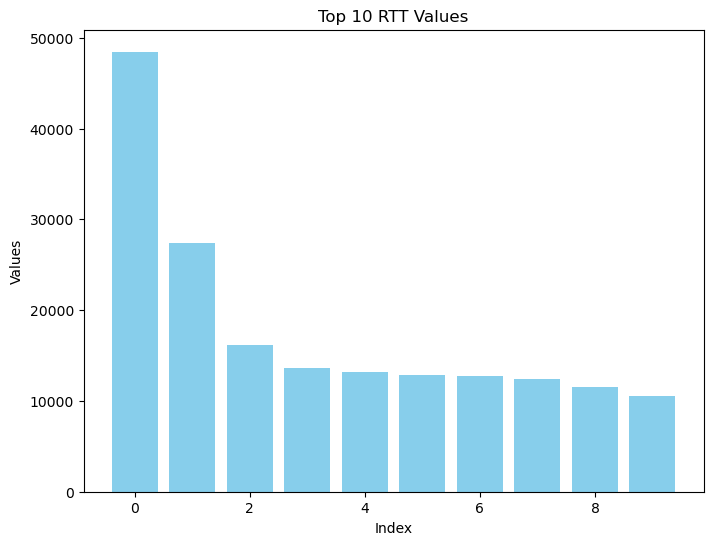

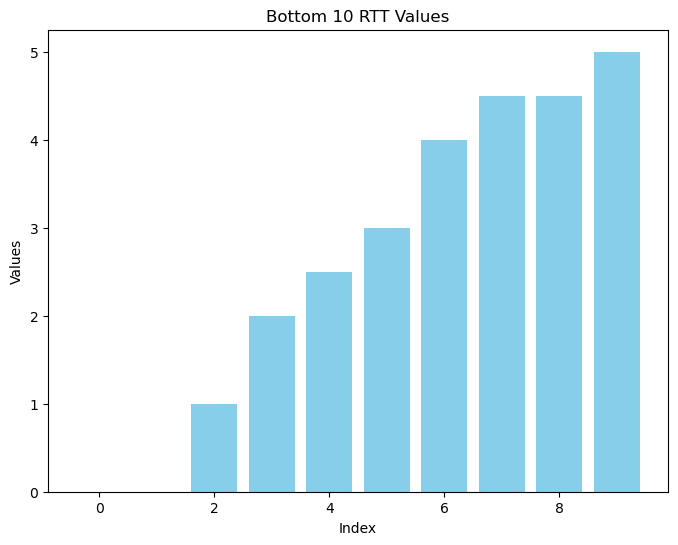

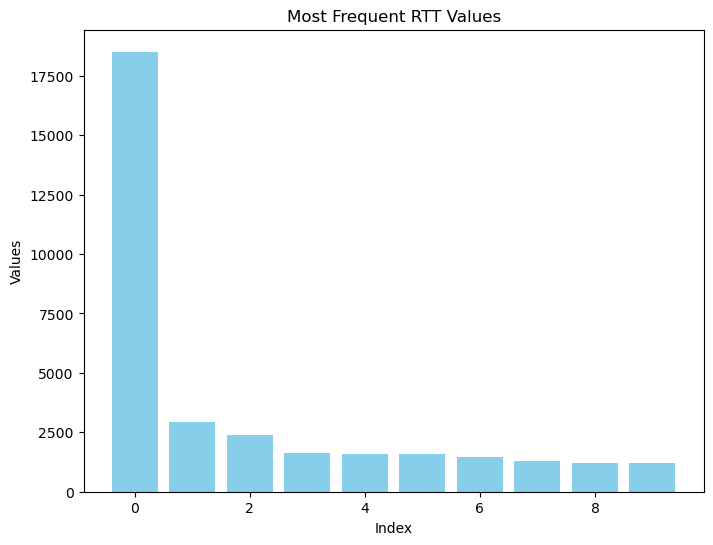

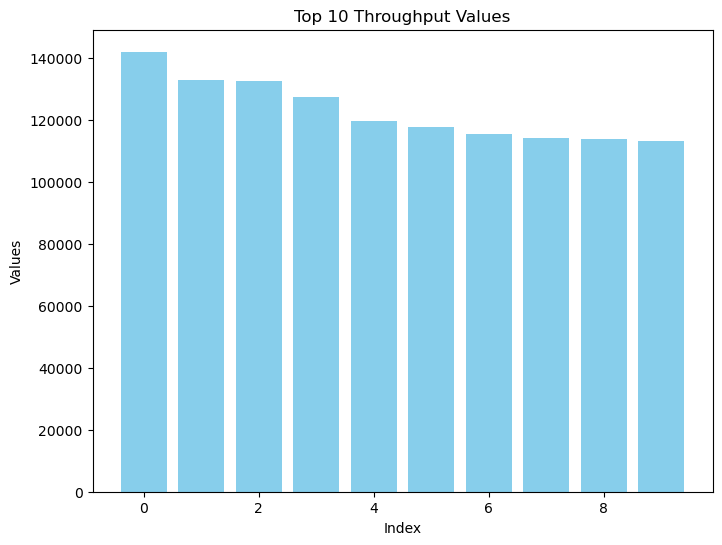

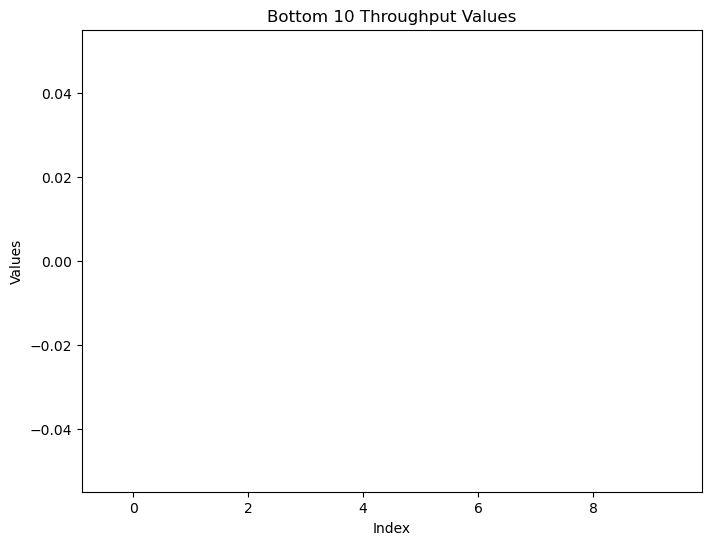

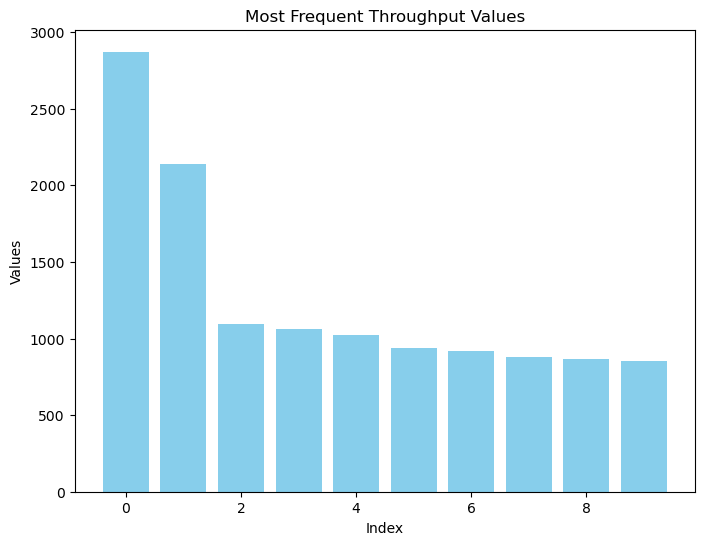

In [14]:
# Function to plot top, bottom, and most frequent values
def plot_values(values, title):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(values)), values, color='skyblue')
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.show()

# Plotting TCP values
plot_values(top_10_tcp, 'Top 10 TCP Values')
plot_values(bottom_10_tcp, 'Bottom 10 TCP Values')
plot_values(most_frequent_tcp, 'Most Frequent TCP Values')

# Plotting RTT values
plot_values(top_10_rtt, 'Top 10 RTT Values')
plot_values(bottom_10_rtt, 'Bottom 10 RTT Values')
plot_values(most_frequent_rtt, 'Most Frequent RTT Values')

# Plotting Throughput values
plot_values(top_10_throughput, 'Top 10 Throughput Values')
plot_values(bottom_10_throughput, 'Bottom 10 Throughput Values')
plot_values(most_frequent_throughput, 'Most Frequent Throughput Values')


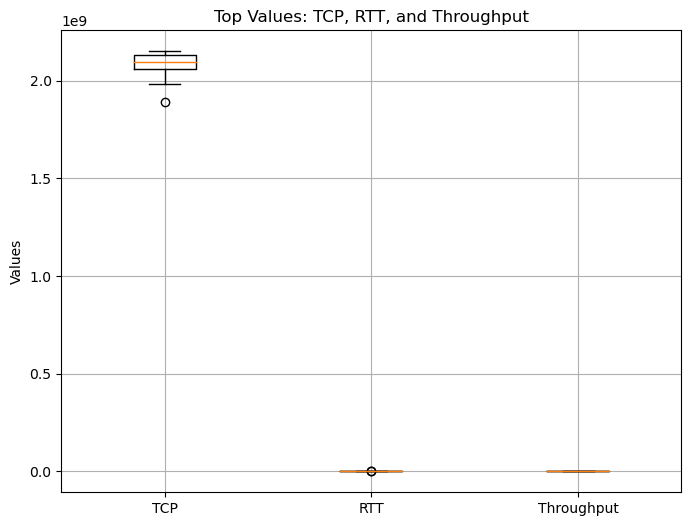

In [15]:
import matplotlib.pyplot as plt

# Function to plot box plots for top values
def plot_boxplot(data, title):
    plt.figure(figsize=(8, 6))
    plt.boxplot(data)
    plt.title(title)
    plt.xticks([1, 2, 3], ['TCP', 'RTT', 'Throughput'])
    plt.ylabel('Values')
    plt.grid(True)
    plt.show()

# Extracting top values for TCP, RTT, and Throughput
top_values = [top_10_tcp.values, top_10_rtt.values, top_10_throughput.values]

# Plotting box plots for top values
plot_boxplot(top_values, 'Top Values: TCP, RTT, and Throughput')


### Task 3.3 - Computing & reporting following

1.The distribution of the average throughput per handset type and provide interpretation for your findings.

2.The average TCP retransmission view per handset type and provide interpretation for your findings.

In [16]:
grouped_data.columns

Index(['MSISDN/Number', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Handset Type',
       'Average TCP Retransmission', 'Average RTT', 'Average Throughput'],
      dtype='object')

### Visualize the distribution of average throughput per handset type:

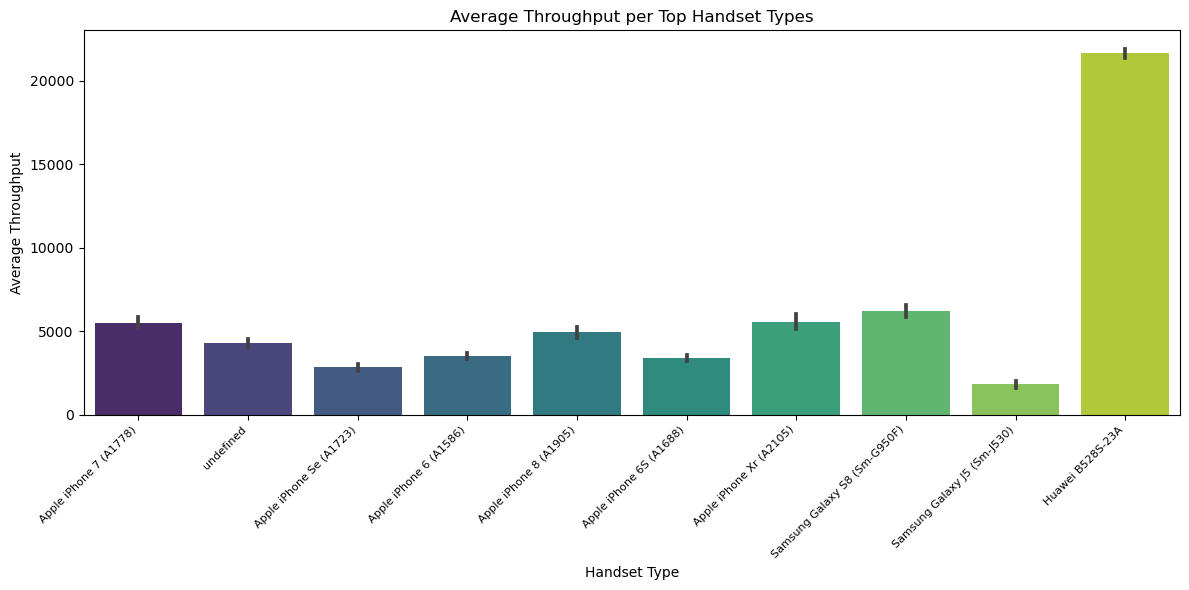

In [17]:
# Calculate the top 10 most frequent handset types
top_handset_types = grouped_data['Handset Type'].value_counts().head(10).index.tolist()

# Filter the dataframe to include only the top handset types
filtered_data = grouped_data[grouped_data['Handset Type'].isin(top_handset_types)]

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='Handset Type', y='Average Throughput', palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Average Throughput per Top Handset Types')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput')
plt.tight_layout()
plt.show()


### Findings

As we already know the most users are using Huawei B2585-23A Handset and there are receving more no of Average Throughput from our network as compare to other handset types .


In [18]:
#2.The average TCP retransmission view per handset type and provide interpretation for your findings.

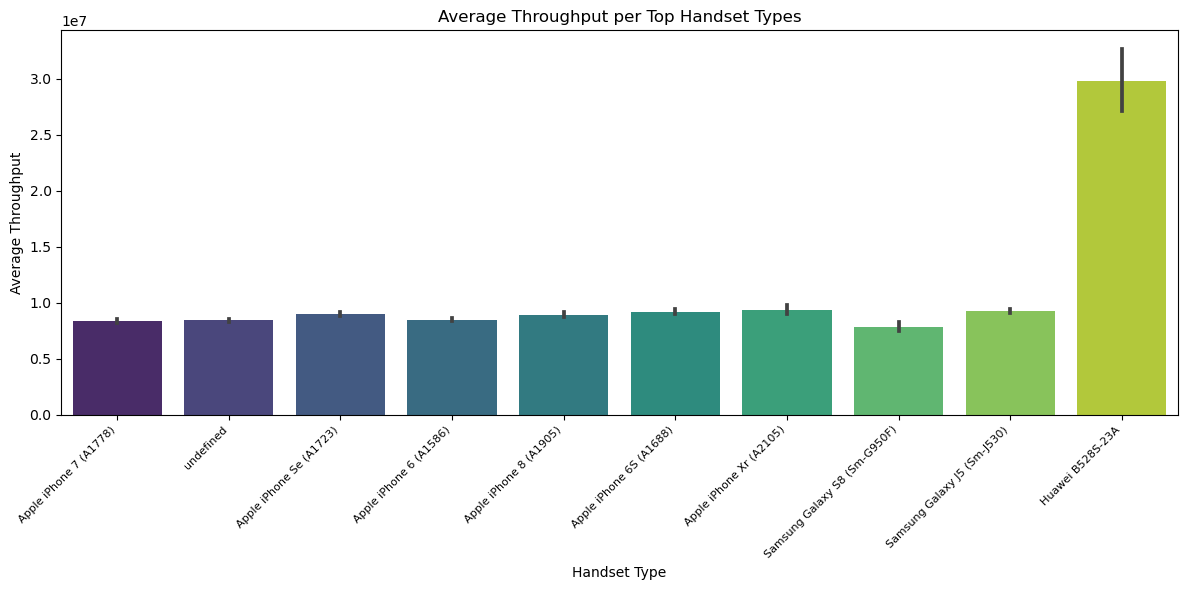

In [19]:
# Calculate the top 10 most frequent handset types
top_handset_types = grouped_data['Handset Type'].value_counts().head(10).index.tolist()

# Filter the dataframe to include only the top handset types
filtered_data = grouped_data[grouped_data['Handset Type'].isin(top_handset_types)]

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='Handset Type', y='Average TCP Retransmission', palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Average Throughput per Top Handset Types')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput')
plt.tight_layout()
plt.show()

### Findings 

According to Above graph we can clearly see that users with Huawei are facing more TCP Retransmission other devies such as apple and Samsung handset have less no of TCP Retransmission as compared to Huawei B52285-23A so we need to work on toward that direction

### Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = ['Average TCP Retransmission', 'Average RTT', 'Average Throughput']

# Subsetting data with selected features
cluster_data = grouped_data[features].copy()

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Applying KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Assigning cluster labels to the data
cluster_data['experience_Cluster'] = cluster_labels

# Analyzing and describing clusters
cluster_summary = cluster_data.groupby('experience_Cluster').mean()

# Displaying the cluster summaries
print(cluster_summary)


                    Average TCP Retransmission  Average RTT  \
experience_Cluster                                            
0                                 8.433076e+06    70.714363   
1                                 1.012299e+07    51.323718   
2                                 1.096150e+09    71.933433   

                    Average Throughput  
experience_Cluster                      
0                          2159.198475  
1                         27526.985451  
2                         35860.751647  


### Cluster Analysis:

#####  Cluster 0:

Average TCP Retransmission: 8.43e+06

Average RTT: 70.71 ms

Average Throughput: 2159.20 kbps

* Interpretation:

Performance: Moderate TCP retransmission with relatively lower RTT and low throughput.

Network Experience: Users in this cluster experience moderate issues with TCP retransmission, implying occasional data packet 
retransmissions. The average throughput is low to moderate, and the latency (RTT) is relatively better compared to other clusters.

##### Cluster 1:

Average TCP Retransmission: 1.01e+07

Average RTT: 51.32 ms

Average Throughput: 27526.99 kbps

* Interpretation:

Performance: High TCP retransmission with low RTT and significantly higher throughput.

Network Experience: Users in this cluster exhibit high TCP retransmission rates, indicating frequent packet retransmissions. However, they experience lower latency (RTT) and significantly higher throughput, suggesting a relatively better network capacity to handle data transmission.

###### Cluster 2:

Average TCP Retransmission: 1.10e+09

Average RTT: 71.93 ms

Average Throughput: 35860.75 kbps

* Interpretation:

Performance: Extremely high TCP retransmission with moderate RTT and very high throughput.

Network Experience: Users in this cluster face severe issues with TCP retransmission, indicating a large number of packet retransmissions. Despite moderate latency (RTT), users experience very high throughput, suggesting that while the network capacity is good, there might be significant issues with data reliability due to high retransmissions.


#### Insights:

Cluster 0 represents users with moderate issues in network performance.

Cluster 1 represents users with good network performance despite high TCP retransmissions.

Cluster 2 represents users facing severe issues with TCP retransmissions, despite high throughput.

In [37]:
experience_Cluster = cluster_data['experience_Cluster']
experience_Cluster.to_csv('experience_Cluster.csv', index=False)

In [33]:
original_data=db.to_csv('original_data.csv', index=False)

In [38]:
cluster_data['experience_Cluster'].isnull().sum()

0